47.046471202117964
19.952840347051684 22.810469514603827
0.0
([0.0, 10.0, 35.63074313602244, 34.017827484326105, 0.0], [0.0, 30.0, 0.0, 0.0, 0.0])
47.04647120211796


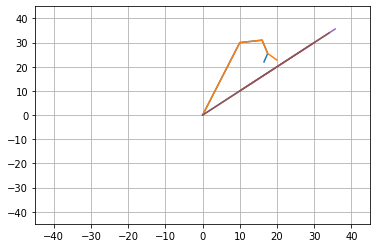

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import math

x = np.array([0.0, 10.0, 16.0, 17.5, 16.5])
y = np.array([0.0, 30.0, 31.0, 25.5, 22.0])

fig, ax = plt.subplots()

axisLimit = 45

plt.grid()
plt.axis([-axisLimit, axisLimit,-axisLimit, axisLimit])
ax.plot(x,y)

def calcDist(start, end):
    xVal = end[0]-start[0]
    yVal = end[1]-start[1]
    return  np.sqrt(xVal**2+yVal**2)

def calcDistThroughPoints(xValues, yValues):
    assert(len(xValues) == len(yValues))
    result = 0
    for i in range(1, len(xValues)):
        result = result + calcDist([xValues[i-1], yValues[i-1]], [xValues[i], yValues[i]])
    return result

print(calcDistThroughPoints(x,y))

rotationInDegrees = 45

c, s = np.cos(rotationInDegrees), np.sin(rotationInDegrees)
#c, s = 0.707, np.sqrt(0.707) #45degrees
#c, s = 0, np.sqrt(1) #90degrees

rotMatrix = np.array([[c, -s], [s, c]])


xRot = x.copy()
yRot = y.copy()

dPoint = [xRot[4], yRot[4]]

def rotationMaxtrixByDegrees(degrees): 
    c, s = np.cos(degrees), np.sin(degrees)
    return np.array([[c, -s], [s, c]])

#dRotated = rotMatrix @ dPoint
def rotation(x,y,c,s):
    return c*x-s*y, s*x+c*y

def rotationByPoint(origon, target, degrees):
    translated = [target[0]-origon[0], target[1]-origon[1]]
    rotTranslated = rotationMaxtrixByDegrees(degrees) @ translated 
    return [rotTranslated[0]+origon[0], rotTranslated[1]+origon[1]]

def rotationFromPoint(origonIndex, x, y, degrees):
    assert(len(x) == len(y))
    resultX = [0.0]*len(x)
    resultY = [0.0]*len(y)
    print(resultX[2])
    for n in range(0, origonIndex+1):
        resultX[n] = x[n]
        resultY[n] = y[n]
    for i in range(origonIndex+1, len(x)-1):
        rotated = rotationByPoint([x[origonIndex], y[origonIndex]], [x[i], y[i]], degrees)
        resultX[i] = rotated[0]
        resultX[i] = rotated[1]
    return resultX, resultY


dRotatedByC = rotationByPoint([xRot[3], yRot[3]], [xRot[4],yRot[4]], 45)
xRot[4] = dRotatedByC[0]
yRot[4] = dRotatedByC[1]

ax.plot(xRot, yRot)

print(xRot[4], yRot[4])

rotationOnA = rotationFromPoint(1, x,y, 45)
print(rotationOnA)
ax.plot(rotationOnA, rotationOnA)

print(calcDistThroughPoints(xRot, yRot))